<div id="container" style="position:relative;">
<div style="float:left"><h1> Data Preprocessing and Modeling</h1></div>
</div>

### Importing the data

In [3]:
from collections import Counter
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import nltk
import re
import warnings

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from textblob import Word
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

# Ignore futurewarnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /Users/Amol/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Amol/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Amol/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Uploading Dataset 1

In [4]:
#df = pd.read_csv('Gluten-freeDF.csv')

try:
    df = pd.read_csv('Gluten-freeDF.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('Gluten-freeDF.csv', encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv('Gluten-freeDF.csv', encoding='ISO-8859-1')

In [5]:
# Check
df.head()

,Ingredient,Gluten?
0,2% Milk,0
1,Abies balsamea (Balsam fir) oil,0
2,Abiu,0
3,Acacia Gum,0
4,Açaí Berry,0


In [6]:
# Lowercasing all the ingredients

df['Ingredient'] = df['Ingredient'].str.lower()

In [7]:
#Sanity check to ensure all the ingredients are lowercase
df.head()

,Ingredient,Gluten?
0,2% milk,0
1,abies balsamea (balsam fir) oil,0
2,abiu,0
3,acacia gum,0
4,açaí berry,0


-----

### Uploading Dataset with more rows and columns

In [8]:
df3 = pd.read_csv('branded_food.csv')

Exploring the dataset

In [9]:
df3.head()

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
0,1105904,Richardson Oilseed Products (US) Limited,NaN,NaN,27000612323,Vegetable Oil,NaN,15.0,ml,NaN,Oils Edible,GDSN,NaN,2020-10-02,2020-11-13,United States,NaN,NaN,NaN,NaN
1,1105905,CAMPBELL SOUP COMPANY,NaN,NaN,51000198808,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",NaN,240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-09-12,2020-11-13,United States,NaN,NaN,NaN,NaN
2,1105906,CAMPBELL SOUP COMPANY,NaN,NaN,51000213273,"INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...",NaN,440.0,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States,NaN,NaN,NaN,NaN
3,1105907,CAMPBELL SOUP COMPANY,NaN,NaN,51000213303,"INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...",NaN,440.0,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States,NaN,NaN,NaN,NaN
4,1105908,CAMPBELL SOUP COMPANY,NaN,NaN,51000224637,"INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...",NaN,240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-10-03,2020-11-13,United States,NaN,NaN,NaN,NaN


In [10]:
df3.shape

(1845297, 20)

In [11]:
df3.isna().sum()

fdc_id                               0
brand_owner                      14418
brand_name                      547614
subbrand_name                  1758248
gtin_upc                             0
ingredients                       5393
not_a_significant_source_of    1771801
serving_size                     10780
serving_size_unit                19028
household_serving_fulltext     1079658
branded_food_category            10572
data_source                          0
package_weight                 1139264
modified_date                       20
available_date                       0
market_country                       0
discontinued_date              1845297
preparation_state_code         1806146
trade_channel                  1829718
short_description              1806030
dtype: int64

In [12]:
# Droping irreleveant columns
df3 = df3.drop(['discontinued_date','package_weight', 'preparation_state_code', 
                'trade_channel', 'short_description','subbrand_name','not_a_significant_source_of',
                'serving_size', 'serving_size_unit', 'household_serving_fulltext', 'package_weight', 
                'modified_date', 'discontinued_date'
               ], axis=1)
df3.head(2)

,fdc_id,brand_owner,brand_name,gtin_upc,ingredients,branded_food_category,data_source,available_date,market_country
0,1105904,Richardson Oilseed Products (US) Limited,NaN,27000612323,Vegetable Oil,Oils Edible,GDSN,2020-11-13,United States
1,1105905,CAMPBELL SOUP COMPANY,NaN,51000198808,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",Herbs/Spices/Extracts,GDSN,2020-11-13,United States


In [13]:
df3 = df3.dropna()

In [14]:
df3.isna().sum()

fdc_id                   0
brand_owner              0
brand_name               0
gtin_upc                 0
ingredients              0
branded_food_category    0
data_source              0
available_date           0
market_country           0
dtype: int64

In [15]:
df3.shape

(1282123, 9)

Lets create a heatmap to see the most common `brand_owner`, `branded_food_category`, `brand_name` and `market_country`.

In [16]:
top_20_brands_df = df3[df3['brand_name'].isin(df3['brand_name'].value_counts()[:20].index.to_list())]
top_20_brands_df.shape

(211357, 9)

In [17]:
top_20_brands_df.head(1)

,fdc_id,brand_owner,brand_name,gtin_upc,ingredients,branded_food_category,data_source,available_date,market_country
477710,1849687,"Meijer, Inc.",MEIJER,41250003106,"EXTRA VIRGIN OLIVE OIL**, SOY LECITHIN, DIMETH...",Vegetable & Cooking Oils,LI,2021-07-29,United States


In [18]:
# Get the top 15 brands by count
top_15_brands = df3['brand_name'].value_counts()[:15].index.tolist()

# Filter the DataFrame to include only the top 15 brands
top_15_brands_df = df3[df3['brand_name'].isin(top_15_brands)]

# Create a new DataFrame to store brand counts
brand_counts = top_15_brands_df['brand_name'].value_counts().reset_index()
brand_counts.columns = ['brand_name', 'count']

brand_counts.head(2)

,brand_name,count
0,GREAT VALUE,20494
1,MEIJER,18502


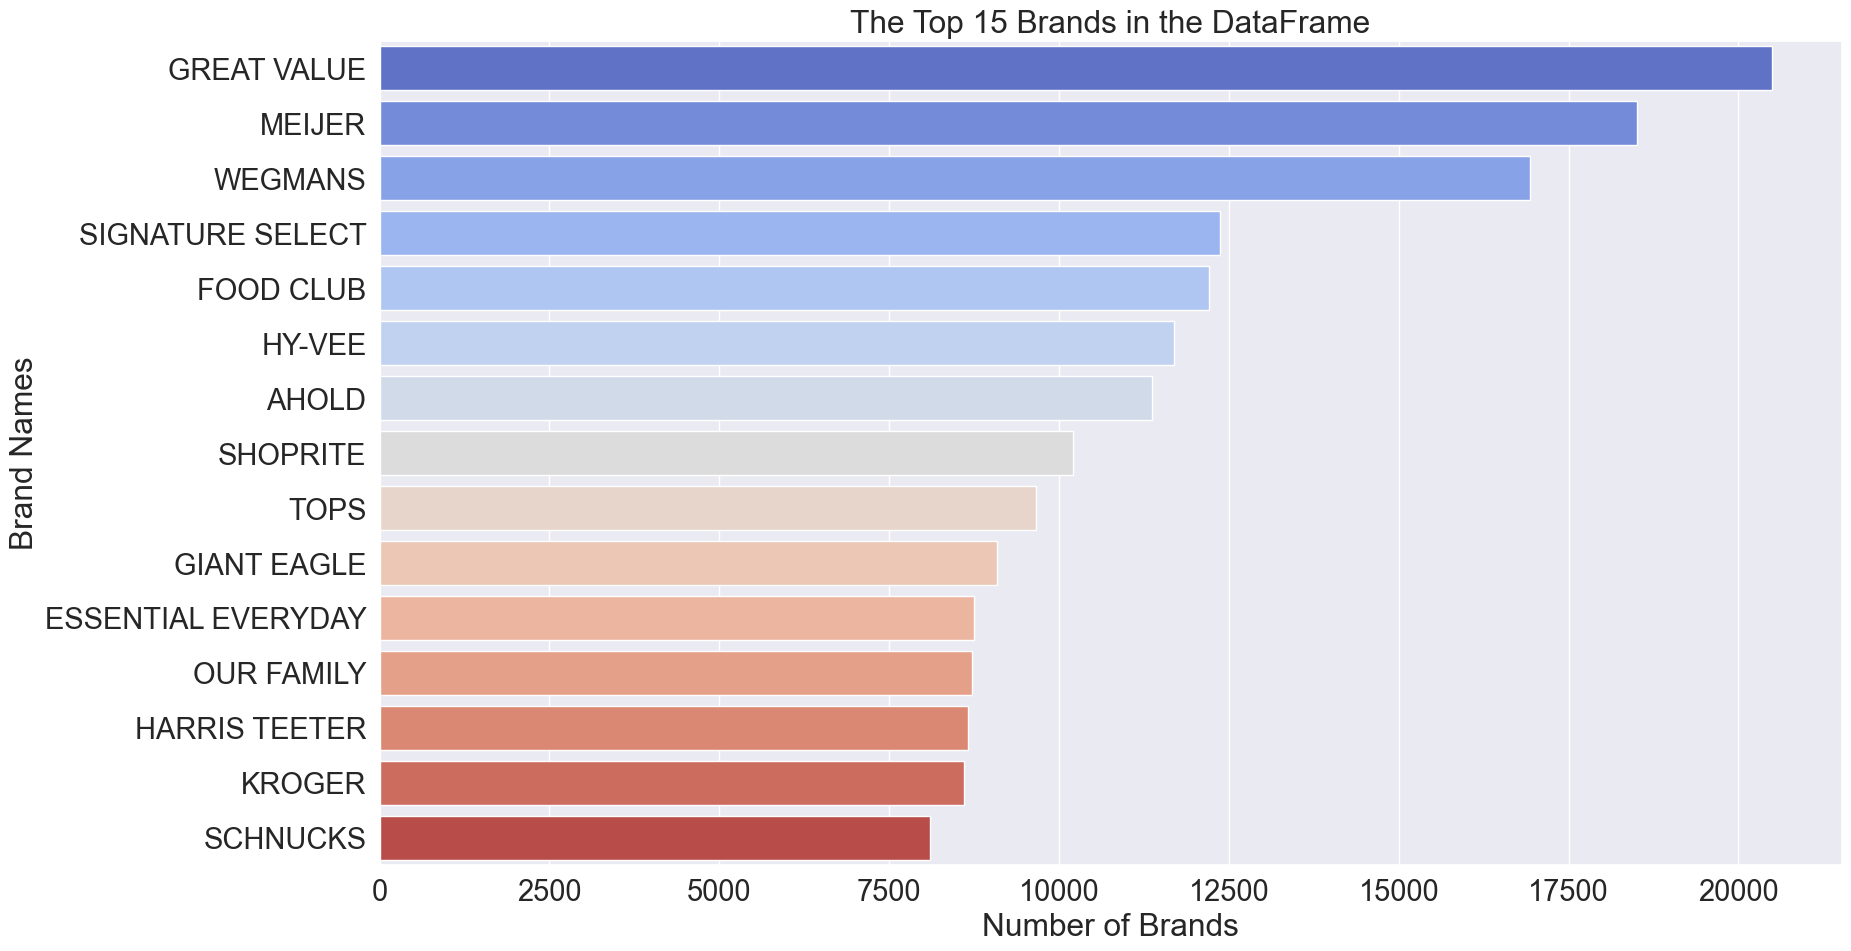

In [19]:
sns.set(font_scale=1.9)
plt.figure(figsize=(19, 10))
sns.barplot(y='brand_name', x='count', data=brand_counts, palette='coolwarm')
plt.xlabel("Number of Brands")
plt.ylabel("Brand Names")
plt.title("The Top 15 Brands in the DataFrame")
plt.tight_layout()
plt.show()

Let's create a graph to see the 10 most common `branded_food_category'

In [20]:
# Get the top 20 category by count
top_10_category= df3['branded_food_category'].value_counts()[:10].index.tolist()

# Filter the DataFrame to include only the top 20 food category
top_10_category_df = df3[df3['branded_food_category'].isin(top_10_category)]

# Create a new DataFrame to store category counts
category_counts = top_10_category_df['branded_food_category'].value_counts().reset_index()
category_counts.columns = ['branded_food_category', 'count']

category_counts.shape

(10, 2)

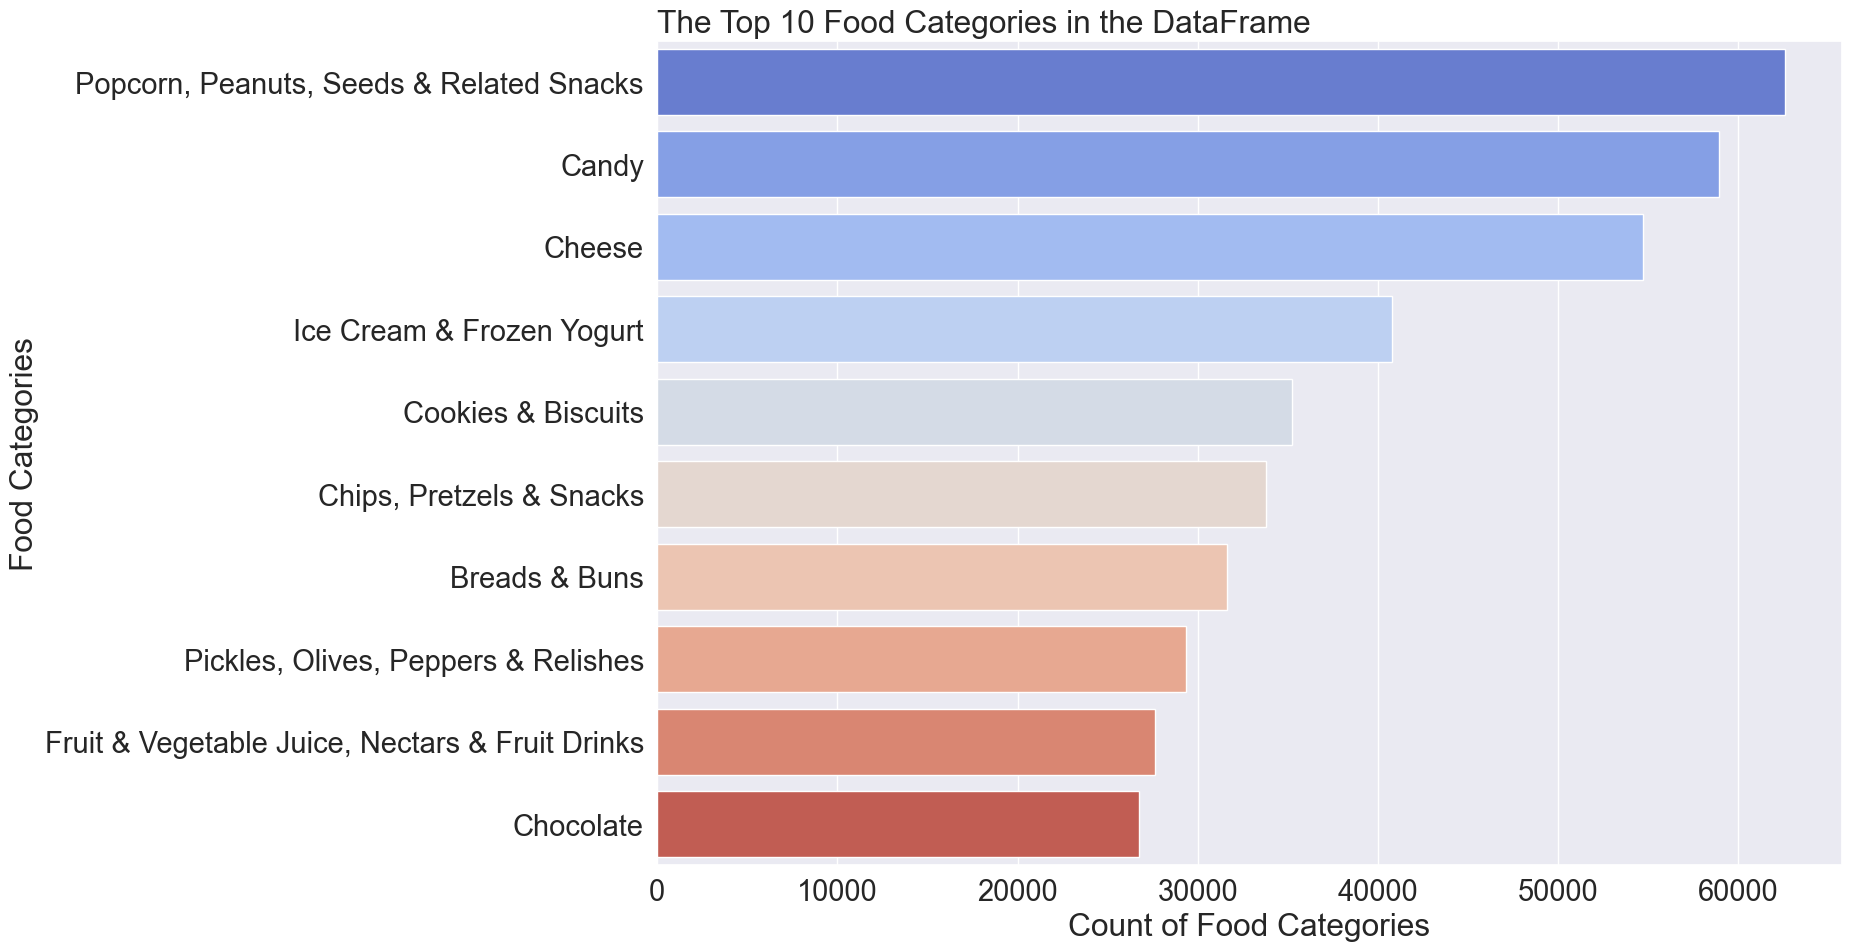

In [21]:
sns.set(font_scale=1.9)
plt.figure(figsize=(19, 10))
sns.barplot(y='branded_food_category', x='count', data=category_counts, palette='coolwarm')
plt.xlabel("Count of Food Categories")
plt.ylabel("Food Categories", loc='center')
plt.title("The Top 10 Food Categories in the DataFrame", loc='left')
plt.tight_layout()
plt.show()

# Uploading Dataset 2

In [22]:
df2 = pd.read_csv('Gluten-free1.csv',encoding='utf-8')

In [23]:
df2.head()

,ingredients,gluten-free?
0,"ALL PURPOSE GF FLOUR (BROWN RICE FLOUR, POTATO...",yes
1,"ALL PURPOSE GF FLOUR (BROWN RICE FLOUR, POTATO...",yes
2,"GLUTEN FREE FLOUR (TAPIOCA STARCH, BROWN RICE ...",yes
3,"GLUTEN FREE FLOUR (TAPIOCA, WHITE RICE, SORGHU...",yes
4,"GLUTEN FREE FLOUR (TAPIOCA STARCH, WHITE RICE ...",yes


In [24]:
ing_row = df2["ingredients"]
ing_row.head()

0    ALL PURPOSE GF FLOUR (BROWN RICE FLOUR, POTATO...
1    ALL PURPOSE GF FLOUR (BROWN RICE FLOUR, POTATO...
2    GLUTEN FREE FLOUR (TAPIOCA STARCH, BROWN RICE ...
3    GLUTEN FREE FLOUR (TAPIOCA, WHITE RICE, SORGHU...
4    GLUTEN FREE FLOUR (TAPIOCA STARCH, WHITE RICE ...
Name: ingredients, dtype: object

In [25]:
df['Gluten?'] = df['Gluten?'].replace('yes', 1)
df['Gluten?'] = df['Gluten?'].replace('no', 0)
df.head()

,Ingredient,Gluten?
0,2% milk,0
1,abies balsamea (balsam fir) oil,0
2,abiu,0
3,acacia gum,0
4,açaí berry,0


In [26]:
df2['gluten-free?']= df2['gluten-free?'].replace('yes',1)
df2['gluten-free?']= df2['gluten-free?'].replace('no',1)

In [27]:
df2.head(3)

,ingredients,gluten-free?
0,"ALL PURPOSE GF FLOUR (BROWN RICE FLOUR, POTATO...",1
1,"ALL PURPOSE GF FLOUR (BROWN RICE FLOUR, POTATO...",1
2,"GLUTEN FREE FLOUR (TAPIOCA STARCH, BROWN RICE ...",1


------

### Cleaning the Data

In [28]:
pattern = r'[(),\[\]:]'

individual_ingredients = []
for row in ing_row:
    ingredients_list = re.split(pattern, row)
    individual_ingredients.extend(ingredients_list)

Removing white space

In [29]:
clean_data_stripped = [item.strip() for item in individual_ingredients]

In [30]:
clean_data_stripped

['ALL PURPOSE GF FLOUR',
 'BROWN RICE FLOUR',
 'POTATO FLOUR',
 'TAPIOCA FLOUR',
 'POTATO STARCH',
 'WHITE RICE FLOUR',
 'XANTHAN GUM',
 '',
 'ORGANIC CANE SUGAR',
 'VEGAN BUTTERY SPREAD',
 '',
 'OIL BLEND',
 'PALM FRUIT',
 'CANOLA',
 'OLIVE',
 '',
 'WATER',
 'SALT',
 'NATURAL FLAVOR',
 'SUNFLOWER LECITHIN',
 'LACTIC ACID',
 'ANNATTO EXTRACT',
 '',
 'ORGANIC BROWN SUGAR',
 'VEGAN CHOCOLATE',
 'ORGANIC SUGAR',
 'CHOCOLATE',
 'COCOA BUTTER',
 'SOY LECITHIN',
 'VANILLA BEAN',
 '',
 'WATER',
 'TAPIOCA SYRUP',
 'LESS THAN 2% OF',
 'PALM FRUIT OIL',
 'PURE VANILLA EXTRACT',
 'WATER',
 'ALCOHOL 40%',
 'VANILLA BEANS',
 '',
 'CREAM OF TARTAR',
 'SUNFLOWER LECITHIN',
 'KOSHER SALT',
 'BAKING SODA',
 'GUAR GUM',
 'KONJAC',
 'XANTHAN GUM',
 'ALL PURPOSE GF FLOUR',
 'BROWN RICE FLOUR',
 'POTATO FLOUR',
 'TAPIOCA FLOUR',
 'POTATO STARCH',
 'WHITE RICE FLOUR',
 'XANTHAN GUM',
 '',
 'ORGANIC CANE SUGAR',
 'GLUTEN FREE OATS',
 'VEGAN BUTTERY SPREAD',
 '',
 'OIL BLEND',
 'PALM FRUIT',
 'CANOLA',
 'OLIV

-----

In [31]:
# finding out how many indredients are in the file
len(clean_data_stripped)

17592

Adding the data back into the dataset

-----

In [32]:
gf_df = pd.DataFrame(clean_data_stripped, columns=['ingredients'])
gf_df.head(6)

,ingredients
0,ALL PURPOSE GF FLOUR
1,BROWN RICE FLOUR
2,POTATO FLOUR
3,TAPIOCA FLOUR
4,POTATO STARCH
5,WHITE RICE FLOUR


Process of removing duplicates

In [33]:
gf_df.shape

(17592, 1)

In [34]:
gf_df.duplicated().sum()

16486

In [35]:
# Check in terms of percentages
gf_df.duplicated().sum()/gf_df.shape[0]*100

93.71305138699408

In [36]:
clean_data = gf_df.drop_duplicates()

In [37]:
clean_data.shape

(1106, 1)

In [38]:
clean_data.value_counts()

ingredients     
                    1
PECTIN              1
PIZZA CRUST         1
PIZZA CHEESE        1
PINTO BEAN FLOUR    1
                   ..
FLOUR               1
FLOUR BLEND         1
FLOUR MIX           1
FOLIC ACID          1
YELLOW ONION        1
Length: 1106, dtype: int64

In [39]:
clean_data_stripped = [item.strip() for item in clean_data]

In [40]:
clean_data_stripped

['ingredients']


-------

-----

### Creating a new dataset that contains gluten ingredients

In [41]:
df_gluten = df.copy()

# Sanity Check 
 
df_gluten.head(1)

,Ingredient,Gluten?
0,2% milk,0


In [42]:
# Dataset only contains gluten ingredients
df_gluten = df.loc[df['Gluten?'] == 1]

In [43]:
# Sanity check

df_gluten['Gluten?'].value_counts()

1    284
Name: Gluten?, dtype: int64

In [44]:
df_gluten = df_gluten.drop(['Gluten?'], axis=1)
df_gluten.head()

,Ingredient
1969,acetoacetyl ethyl amino acid
1970,alpha-glucan oligosaccharide
1971,alpha-glucan oligosaccharide crosspolymer
1972,amino hydroxypropyl dimethicone
1973,avena sativa (oat) bran extract


In [45]:
# Redoing the index and dropping the old
df_gluten.reset_index(inplace=True, drop=True)
df_gluten

,Ingredient
0,acetoacetyl ethyl amino acid
1,alpha-glucan oligosaccharide
2,alpha-glucan oligosaccharide crosspolymer
3,amino hydroxypropyl dimethicone
4,avena sativa (oat) bran extract
...,...
279,white flour
280,yeast extract
281,zea mays (corn) germ extract
282,zea mays (corn) oil


### Cleaning the ingredient list for the product for preprocessing the data.

In [46]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/Amol/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Creating a function to clean the ingredient list found in DS 3

In [47]:
def my_tokenizer(sentence):
    # Remove hyphens and set to lowercase
    sentence = sentence.replace('-', ' ').lower()

    # Tokenize sentence into words
    listofwords = re.split(r'[,\(\)\[\]]', sentence)
    listofprocessed_words = []

    # Remove empty strings and leading/trailing whitespace
    for word in listofwords:
        word = word.strip()
        if word != '' and '.' not in word and 'ingredient' not in word:
            singular_word = wordnet.morphy(word)
            if singular_word:
                listofprocessed_words.append(singular_word)
            else:
                listofprocessed_words.append(word)

    return listofprocessed_words

# Example usage
input_ingredient_list = "GLUTEN FREE FLOUR (TAPIOCA STARCH, WHITE RICE FLOUR, SORGHUM FLOUR, CORN STARCH), PALM OIL, WATER, EGGS, SUGAR, SALT, XANTHAN GUM, CHERRY FILLING (CHERRIES, WATER, SUGAR, CORN SYRUP, MODIFIED FOOD STARCH, VEGETABLE GUM, CITRIC ACID, VEGETABLE EXTRACT)."
preprocessed_tokens = my_tokenizer(input_ingredient_list)
print(preprocessed_tokens) 

['gluten free flour', 'tapioca starch', 'white rice flour', 'sorghum flour', 'corn starch', 'palm oil', 'water', 'eggs', 'sugar', 'salt', 'xanthan gum', 'cherry filling', 'cherry', 'water', 'sugar', 'corn syrup', 'modified food starch', 'vegetable gum', 'citric acid', 'vegetable extract']


 Create a function that defines if an ingredient list contains gluten ingredients


In [48]:
def is_gluten_free(lst):
    # Checking if any ingredient in the input list is the same as an ingredient in the gluten list.
    if any(token in list(df_gluten['Ingredient']) for token in my_tokenizer(lst)):
        return 0  # Not gluten-free
    else:
        return 1  # Gluten-free

In [49]:
list(df_gluten['Ingredient'])

['acetoacetyl ethyl amino acid',
 'alpha-glucan oligosaccharide',
 'alpha-glucan oligosaccharide crosspolymer',
 'amino hydroxypropyl dimethicone',
 'avena sativa (oat) bran extract',
 'avena sativa (oat) kernel extract',
 'avena sativa (oat) kernel flour',
 'avena sativa (oat) starch',
 'barley',
 'barley extract',
 'barley lipids',
 'barley malt',
 'beta-glucan',
 'beta-glucan extract',
 'beta-glucan isomerized',
 'bleached flour',
 'bolted flour',
 'bran',
 'bread flour',
 "brewer's yeast",
 'bromated flour',
 'bromododecylglycinate',
 'bulgar wheat',
 'bulgur',
 'dicaprate',
 'butylene glycol dicaprylate',
 'cake flour',
 'capryloyl hydrolyzed wheat protein',
 'capryloyl hydrolyzed wheat starch',
 'chapati flour',
 'couscous',
 'cyclodextrin',
 'dextrin',
 'dextrin palmitate',
 'dextrin stearate',
 'disodium wheat germamido peg-2 sulfosuccinate',
 'disodium wheatgermamido peg-2 sulfosuccinate',
 'dodecyl wheat germamido peg-2 sulfosuccinate',
 'durum',
 'durum wheat',
 'einkorn',
 

Let's check if the function works by creating a list containing gluten ingredients

In [50]:
is_gluten_free(input_ingredient_list)

1

In [51]:
# Example for not gluten-free

input_ingredient_list_nogf = "FLOUR (Wheat flour, WHITE RICE FLOUR, SORGHUM FLOUR, CORN STARCH), PALM OIL,)"

is_gluten_free(input_ingredient_list_nogf)

0

The fuction is working at classify correctly.

Adding a new column in the dataset to indicate if a product is gluten-free based on the `my_tokenizer` and `is_gluten_free` functions made above.

In [52]:
df3["gluten_free?"] = df3['ingredients'].apply(is_gluten_free)

In [53]:
df3.head()

,fdc_id,brand_owner,brand_name,gtin_upc,ingredients,branded_food_category,data_source,available_date,market_country,gluten_free?
13212,1847363,Cargill Incorporated/Honeysuckle White,Honeysuckle White,642205534517,"All Natural White Turkey, Natural Flavoring",Meat/Poultry/Other Animals Unprepared/Unproce...,GDSN,2021-07-29,United States,1
359747,1847364,Cargill Incorporated/Honeysuckle White,HONEYSUCKLE WHITE,642205534500,"All Natural Turkey, Natural Flavoing",Meat/Poultry/Other Animals Unprepared/Unproce...,GDSN,2021-07-29,United States,1
359749,1847365,Cargill Meat Solutions Corp.,Honeysuckle White,90642205500218,Turkey with up to 6% absorbed water,Meat/Poultry/Other Animals Unprepared/Unproce...,GDSN,2021-07-29,United States,1
359877,1847366,Cargill Meat Solutions Corp.,Honeysuckle White,90642205501499,Turkey Wings with up to 6% absorbed water,Meat/Poultry/Other Animals Unprepared/Unproce...,GDSN,2021-07-29,United States,1
360054,1847367,Cargill Meat Solutions Corp.,Honeysuckle White,90642205501529,Turkey containing up to 6% absorbed water,Meat/Poultry/Other Animals Unprepared/Unproce...,GDSN,2021-07-29,United States,1


### Let's run the dataset thru a Naive Bayes classifier

In [54]:

# Split the data into features (ingredient lists) and labels (gluten-free status)
X = df3['ingredients']
y = df3['gluten_free?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the ingredient lists using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8528926586721264
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74     66965
           1       0.92      0.87      0.90    189460

    accuracy                           0.85    256425
   macro avg       0.81      0.83      0.82    256425
weighted avg       0.86      0.85      0.86    256425



Lets make a graph to see the most common ingredients.

In [ ]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 Most Frequently Occurring Ingredients")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()